<a href="https://colab.research.google.com/github/EoghanPower/FinalProjectUCDPA/blob/main/Dataframes_analyzedfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Analyzing the companies sentiments

In [2]:
#import libraries
import tweepy, json 
from textblob import TextBlob 
from wordcloud import wordcloud
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import webbrowser
import time 
import requests
import requests_oauthlib
import os

In [3]:
#import data from google sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('TweetsDF2').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows, columns = ['Number', 'Cleaned_Tweets', 'Subjectivity', 'Polarity', 'Sentiment'])

[['', 'Cleaned_Tweets', 'Subjectivity', 'Polarity', 'Sentiment'], ['0', ', I successfully bought a Tesla using btc😛', '0.95', '0.75', 'Positive'], ['1', '$MSFT Microsoft (MSFT) initiated with an Outperform at SMBC Nikko; tgt $410', '0.0', '0.0', 'Neutral'], ['2', " ,: Korean Superstar Group  scores this week's Highest Debut on the  Songs Chart powered by …", '0.0', '0.0', 'Neutral'], ['3', ' ,: Lots of Tesla cars to deliver before year end! Your support in taking delivery is much appreciated. Thanks also to the Tesl…', '0.15000000000000002', '0.2', 'Positive'], ['4', ' ,: Today Amazon workers in Chicago walked off the job demanding better pay, Amazon workers in Staten Island also walked off,…', '0.5', '0.5', 'Positive'], ['5', ' ,: one of these workers told HR and management that he wasn’t feeling well and they told him that he was out of unpaid time of…', '0.4', '0.2', 'Positive'], ['6', ' ,: Justin Welby defending Johnson and the cheese &amp; wine party and saying they were "bearing 

In [4]:
df.head()

,Number,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
1,0,", I successfully bought a Tesla using btc😛",0.95,0.75,Positive
2,1,$MSFT Microsoft (MSFT) initiated with an Outpe...,0.0,0.0,Neutral
3,2,",: Korean Superstar Group scores this week's...",0.0,0.0,Neutral
4,3,",: Lots of Tesla cars to deliver before year ...",0.15000000000000002,0.2,Positive


In [5]:
df['Sentiment'].value_counts()

Neutral      4661
Positive     3889
Negative     1450
Sentiment       1
Name: Sentiment, dtype: int64

In [6]:
#start to filter
#filtering for words in text
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [18]:
# initialize a list to store tweet counts
[Apple, Microsoft, Google,Amazon, Facebook, Tesla, JPMorgan, JohnsonJohnson, HomeDepot, Walmart] = [0,0,0,0,0,0,0,0,0,0]

In [19]:
# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    Apple += word_in_text('apple', row['Cleaned_Tweets'])
    Microsoft += word_in_text('microsoft', row['Cleaned_Tweets'])
    Google += word_in_text('google', row['Cleaned_Tweets'])
    Amazon += word_in_text('amazon', row['Cleaned_Tweets'])
    Facebook += word_in_text('facebook', row['Cleaned_Tweets'])
    Tesla += word_in_text('tesla', row['Cleaned_Tweets'])
    JPMorgan += word_in_text('JPMorgan', row['Cleaned_Tweets'])
    JohnsonJohnson += word_in_text('johnson and johnson', row['Cleaned_Tweets'])
    HomeDepot += word_in_text('home depot', row['Cleaned_Tweets'])
    Walmart += word_in_text('Walmart', row['Cleaned_Tweets'])

In [20]:
import seaborn as sns
sns.set(color_codes=True)

In [23]:
# Create a list of labels:lb
lb = ['AAPL', 'MSFT', 'GOOGL','AMZN', 'FB', 'TSLA', 'JPM', 'JNJ', 'HD', 'WMT']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


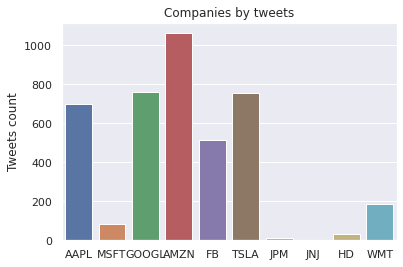

In [25]:
#plot abar chart
ax = sns.barplot(lb, [Apple, Microsoft, Google,Amazon, Facebook, Tesla, JPMorgan, JohnsonJohnson, HomeDepot, Walmart] )
ax.set(ylabel="Tweets count")
plt.title('Companies by tweets')
plt.show()

In [26]:
#import financial details
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('sp500_companies10').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
Marketcappd = pd.DataFrame.from_records(rows, columns = ['Number', 'Shortname', 'CurrentPrice', 'MarketCap'])

[['', 'Shortname', 'Currentprice', 'Marketcap'], ['1', 'Apple Inc.', '172.99', '2.84E+12'], ['2', 'Microsoft Corporation', '327.29', '2.47E+12'], ['3', 'Alphabet Inc', '2884.41', '1.91E+12'], ['4', 'Amazon.com, Inc.', '3408.34', '1.73E+12'], ['5', 'Meta Platforms,Inc', '334.2', '9.48E+11'], ['6', 'Tesla, Inc.', '938.53', '9.04E+11'], ['7', 'JP Morgan Chase & Co', '156.09', '4.73E+11'], ['8', 'Johnson & Johnson', '167.21', '4.40E+11'], ['9', 'Home Depot, Inc (The)', '390.47', '4.15E+11'], ['10', 'Walmart Inc.', '139.62', '3.91E+11']]


In [27]:
Marketcappd.head()

,Number,Shortname,CurrentPrice,MarketCap
0,,Shortname,Currentprice,Marketcap
1,1,Apple Inc.,172.99,2.84E+12
2,2,Microsoft Corporation,327.29,2.47E+12
3,3,Alphabet Inc,2884.41,1.91E+12
4,4,"Amazon.com, Inc.",3408.34,1.73E+12


In [ ]:
#add the tweet count to this dataframe

In [29]:
No_ofTweets = [Apple, Microsoft, Google,Amazon, Facebook, Tesla, JPMorgan, JohnsonJohnson, HomeDepot, Walmart]
print(No_ofTweets)

[698, 83, 758, 1062, 516, 753, 14, 2, 32, 186]


In [37]:
#need to add to the list 
No_ofTweets.insert(0,0)
print(No_ofTweets)

[0, 0, 0, 698, 83, 758, 1062, 516, 753, 14, 2, 32, 186]


In [40]:
No_ofTweets.remove(0)
print(No_ofTweets)

[0, 0, 698, 83, 758, 1062, 516, 753, 14, 2, 32, 186]


In [41]:
No_ofTweets.remove(0)
print(No_ofTweets)

[0, 698, 83, 758, 1062, 516, 753, 14, 2, 32, 186]


In [42]:
Marketcappd['No.OfTweets'] = np.array(No_ofTweets)

In [158]:
Marketcappd.head(10)

,Number,Shortname,CurrentPrice,MarketCap,No.OfTweets
0,,Shortname,Currentprice,Marketcap,0
1,1,Apple Inc.,172.99,2.84E+12,698
2,2,Microsoft Corporation,327.29,2.47E+12,83
3,3,Alphabet Inc,2884.41,1.91E+12,758
4,4,"Amazon.com, Inc.",3408.34,1.73E+12,1062
5,5,"Meta Platforms,Inc",334.2,9.48E+11,516
6,6,"Tesla, Inc.",938.53,9.04E+11,753
7,7,JP Morgan Chase & Co,156.09,4.73E+11,14
8,8,Johnson & Johnson,167.21,4.40E+11,2
9,9,"Home Depot, Inc (The)",390.47,4.15E+11,32


In [44]:
#drop a row
marketcap = Marketcappd.drop(labels=0, axis=0)

In [56]:
print(marketcap)

   Number              Shortname CurrentPrice MarketCap  No.OfTweets
1       1             Apple Inc.       172.99  2.84E+12          698
2       2  Microsoft Corporation       327.29  2.47E+12           83
3       3           Alphabet Inc      2884.41  1.91E+12          758
4       4       Amazon.com, Inc.      3408.34  1.73E+12         1062
5       5     Meta Platforms,Inc        334.2  9.48E+11          516
6       6            Tesla, Inc.       938.53  9.04E+11          753
7       7   JP Morgan Chase & Co       156.09  4.73E+11           14
8       8      Johnson & Johnson       167.21  4.40E+11            2
9       9  Home Depot, Inc (The)       390.47  4.15E+11           32
10     10           Walmart Inc.       139.62  3.91E+11          186


In [52]:
#make market cap smaller divide by a billion


In [57]:
mcnumpy = [284000,247000,191000, 173000, 948, 904, 473, 440, 415, 391 ]

In [58]:
print(mcnumpy)

[284000, 247000, 191000, 173000, 948, 904, 473, 440, 415, 391]


In [59]:
marketcap['Marketcapinbns'] = mcnumpy

In [60]:
marketcap.head()

,Number,Shortname,CurrentPrice,MarketCap,No.OfTweets,Marketcapinbns
1,1,Apple Inc.,172.99,2.84E+12,698,284000
2,2,Microsoft Corporation,327.29,2.47E+12,83,247000
3,3,Alphabet Inc,2884.41,1.91E+12,758,191000
4,4,"Amazon.com, Inc.",3408.34,1.73E+12,1062,173000
5,5,"Meta Platforms,Inc",334.2,9.48E+11,516,948


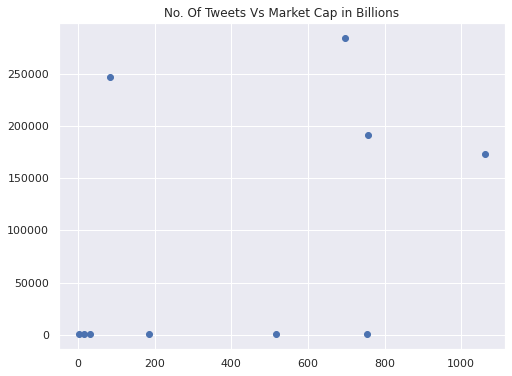

In [191]:
#Scatterplot of tweets and marketcap
X =  marketcap['No.OfTweets']
Y=  marketcap['Marketcapinbns']

plt.figure(figsize=(8,6))
plt.scatter( X, Y)
plt.title('No. Of Tweets Vs Market Cap in Billions')
plt.show()



In [114]:
#Subsetting to get sentiments

In [159]:
df['Apple'] = df['Cleaned_Tweets'].apply(lambda tweet: word_in_text('apple', tweet))
df['Google'] = df['Cleaned_Tweets'].apply(lambda tweet: word_in_text('google', tweet))
df['Microsoft'] = df['Cleaned_Tweets'].apply(lambda tweet: word_in_text('microsoft', tweet))

In [160]:
df['Amazon'] = df['Cleaned_Tweets'].apply(lambda tweet: word_in_text('amazon', tweet))
df['Meta'] = df['Cleaned_Tweets'].apply(lambda tweet: word_in_text('meta', tweet))
df['JPMorgan'] = df['Cleaned_Tweets'].apply(lambda tweet: word_in_text('JPMorgan', tweet))
df['Johnson & Johnson'] = df['Cleaned_Tweets'].apply(lambda tweet: word_in_text('johnson and johnson', tweet))
df['Walmart'] = df['Cleaned_Tweets'].apply(lambda tweet: word_in_text('Walmart', tweet))
df['Tesla'] = df['Cleaned_Tweets'].apply(lambda tweet: word_in_text('Tesla', tweet))
df['HomeDepot'] = df['Cleaned_Tweets'].apply(lambda tweet: word_in_text('Homedepot', tweet))


In [161]:
print(df.head(30))

   Number                                     Cleaned_Tweets  ...  Tesla HomeDepot
0                                             Cleaned_Tweets  ...  False     False
1       0         , I successfully bought a Tesla using btc😛  ...   True     False
2       1  $MSFT Microsoft (MSFT) initiated with an Outpe...  ...  False     False
3       2   ,: Korean Superstar Group  scores this week's...  ...  False     False
4       3   ,: Lots of Tesla cars to deliver before year ...  ...   True     False
5       4   ,: Today Amazon workers in Chicago walked off...  ...  False     False
6       5   ,: one of these workers told HR and managemen...  ...  False     False
7       6   ,: Justin Welby defending Johnson and the che...  ...  False     False
8       7                                  ,_ google flights  ...  False     False
9       8  , , Because of inflation, shortages, and the f...  ...   True     False
10      9   ,: .,'s "THE ALBUM" is now the longest charti...  ...  False     False
11  

In [162]:
sentimentsdf = df.drop(columns = ['Cleaned_Tweets', 'Subjectivity', 'Polarity', ])

In [163]:
sentimentsdf.head(35)

,Number,Sentiment,Apple,Google,Microsoft,Amazon,Meta,JPMorgan,Johnson & Johnson,Walmart,Tesla,HomeDepot
0,,Sentiment,False,False,False,False,False,False,False,False,False,False
1,0,Positive,False,False,False,False,False,False,False,False,True,False
2,1,Neutral,False,False,True,False,False,False,False,False,False,False
3,2,Neutral,False,False,False,False,False,False,False,False,False,False
4,3,Positive,False,False,False,False,False,False,False,False,True,False
5,4,Positive,False,False,False,True,False,False,False,False,False,False
6,5,Positive,False,False,False,False,False,False,False,False,False,False
7,6,Neutral,False,False,False,False,False,False,False,False,False,False
8,7,Neutral,False,True,False,False,False,False,False,False,False,False
9,8,Positive,False,False,False,False,False,False,False,False,True,False


In [164]:
sentimentsdf['Apple'].value_counts()

False    9303
True      698
Name: Apple, dtype: int64

In [167]:
#now subset 
Applesentimentsdf = sentimentsdf[sentimentsdf['Apple'] == True]
Googlesentimentsdf = sentimentsdf[sentimentsdf['Google'] == True]
Microsoftsentimentsdf = sentimentsdf[sentimentsdf['Microsoft'] == True]
Amazonsentimentsdf = sentimentsdf[sentimentsdf['Amazon'] == True]
Metasentimentsdf = sentimentsdf[sentimentsdf['Meta'] == True]
JPMorgansentimentsdf = sentimentsdf[sentimentsdf['JPMorgan'] == True]
JohnsonJohnsonsentimentsdf = sentimentsdf[sentimentsdf['Johnson & Johnson'] == True]
Walmartsentimentsdf = sentimentsdf[sentimentsdf['Walmart'] == True]
Teslasentimentsdf = sentimentsdf[sentimentsdf['Tesla'] == True]
HomeDepotsentimentsdf = sentimentsdf[sentimentsdf['Meta'] == True]


In [168]:
Applesentimentsdf.head()

,Number,Sentiment,Apple,Google,Microsoft,Amazon,Meta,JPMorgan,Johnson & Johnson,Walmart,Tesla,HomeDepot
10,9,Neutral,True,False,False,False,False,False,False,False,False,False
25,24,Neutral,True,False,False,False,False,False,False,False,False,False
27,26,Neutral,True,False,False,False,False,False,False,False,False,False
48,47,Neutral,True,False,False,False,False,False,False,False,False,False
50,49,Neutral,True,False,False,False,False,False,False,False,False,False


In [169]:
Applesentimentsdf['Sentiment'].value_counts()

Neutral     335
Positive    283
Negative     80
Name: Sentiment, dtype: int64

In [170]:
Applesentimentsdf['Sentiment'].value_counts('percentage')

Neutral     0.479943
Positive    0.405444
Negative    0.114613
Name: Sentiment, dtype: float64

In [182]:
Microsoftsentimentsdf['Sentiment'].value_counts('percentage')

Neutral     0.506024
Positive    0.409639
Negative    0.084337
Name: Sentiment, dtype: float64

In [171]:
Googlesentimentsdf['Sentiment'].value_counts('percentage')

Neutral     0.568602
Positive    0.273087
Negative    0.158311
Name: Sentiment, dtype: float64

In [172]:
Amazonsentimentsdf['Sentiment'].value_counts('percentage')

Neutral     0.363465
Positive    0.334275
Negative    0.302260
Name: Sentiment, dtype: float64

In [173]:
Metasentimentsdf['Sentiment'].value_counts('percentage')

Neutral     0.370968
Positive    0.322581
Negative    0.306452
Name: Sentiment, dtype: float64

In [150]:
JPMorgansentimentsdf['Sentiment'].value_counts('percentage')

Neutral     0.714286
Positive    0.214286
Negative    0.071429
Name: Sentiment, dtype: float64

In [155]:
JohnsonJohnsonsentimentsdf['Sentiment'].value_counts('percentage')

Series([], Name: Sentiment, dtype: float64)

In [157]:
Walmartsentimentsdf['Sentiment'].value_counts()

Series([], Name: Sentiment, dtype: int64)

In [153]:
Teslasentimentsdf['Sentiment'].value_counts('percentage')

Positive    0.621514
Neutral     0.306773
Negative    0.071713
Name: Sentiment, dtype: float64

In [154]:
HomeDepotsentimentsdf['Sentiment'].value_counts('percentage')

Neutral     0.370968
Positive    0.322581
Negative    0.306452
Name: Sentiment, dtype: float64

In [183]:
#create a numpy array to capture the percentages of positive tweets
Positivetweetspct = [40.5,40.9, 27.3,33.4,32.3,21.4,0,0,62,32]

In [184]:
marketcap['% Positive tweets'] = Positivetweetspct

In [185]:
print(marketcap)

   Number              Shortname  ... Marketcapinbns % Positive tweets
1       1             Apple Inc.  ...         284000              40.5
2       2  Microsoft Corporation  ...         247000              40.9
3       3           Alphabet Inc  ...         191000              27.3
4       4       Amazon.com, Inc.  ...         173000              33.4
5       5     Meta Platforms,Inc  ...            948              32.3
6       6            Tesla, Inc.  ...            904              21.4
7       7   JP Morgan Chase & Co  ...            473               0.0
8       8      Johnson & Johnson  ...            440               0.0
9       9  Home Depot, Inc (The)  ...            415              62.0
10     10           Walmart Inc.  ...            391              32.0

[10 rows x 7 columns]


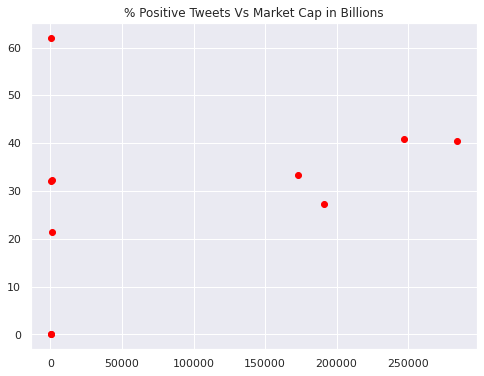

In [195]:
#create a scatter to visualise it
X = marketcap['Marketcapinbns']
Y= marketcap['% Positive tweets']
plt.figure(figsize=(8,6))
plt.scatter( X, Y , Color = 'Red',)
plt.title('% Positive Tweets Vs Market Cap in Billions')
plt.show()


In [197]:
#Create a correlation matrix
sns.set_theme(style="white")

corr = marketcap.corr()

In [198]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))


Text(0.5, 1.0, 'Correllation Matrix')

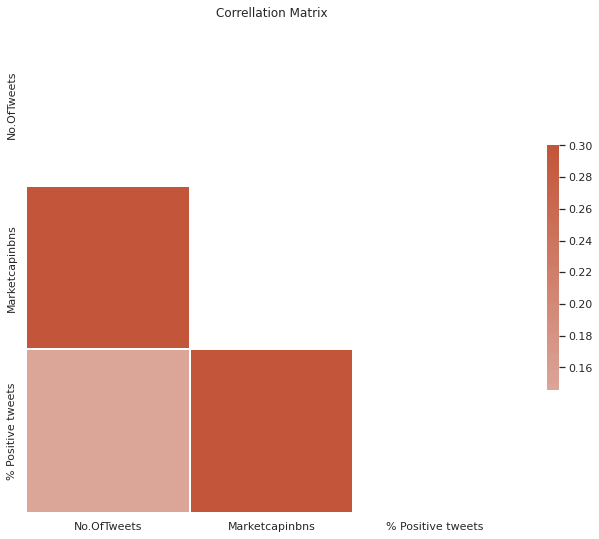

In [201]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correllation Matrix')